In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st
from scipy import stats

In [2]:
df=pd.read_csv(r'C:\Users\abish\Desktop\Notebook\jupyter\284_618_bundle_archive\vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()  # To check the total null values in each column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
df.dropna(how="any",inplace = True) #Drop the NA values where at least one element is missing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

# 1) To check which genre game made the most:

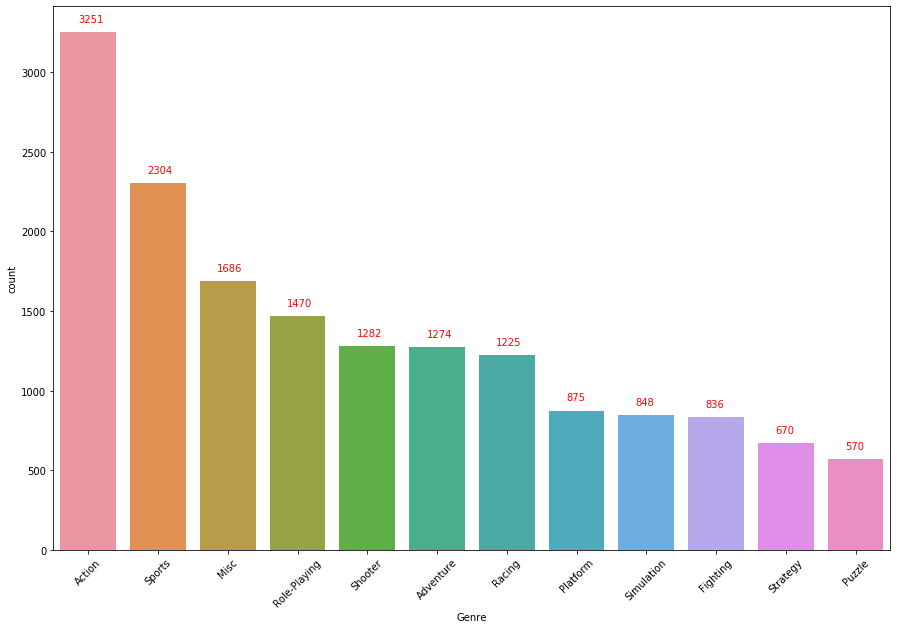

In [30]:
plt.figure(figsize=(15,10))
Genre_plot= sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.xticks(rotation=45)
for q in Genre_plot.patches:
    Genre_plot.annotate(str(q.get_height()),(q.get_x()+0.25, q.get_height()+50), va='bottom', color='red')
plt.show()

Action genre game made the most of all games with a count of 3251 games

# 2) Determining which year had the most number of games released?

In [15]:
df['Year']=df['Year'].astype(int) #converting column year data type from float to int
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


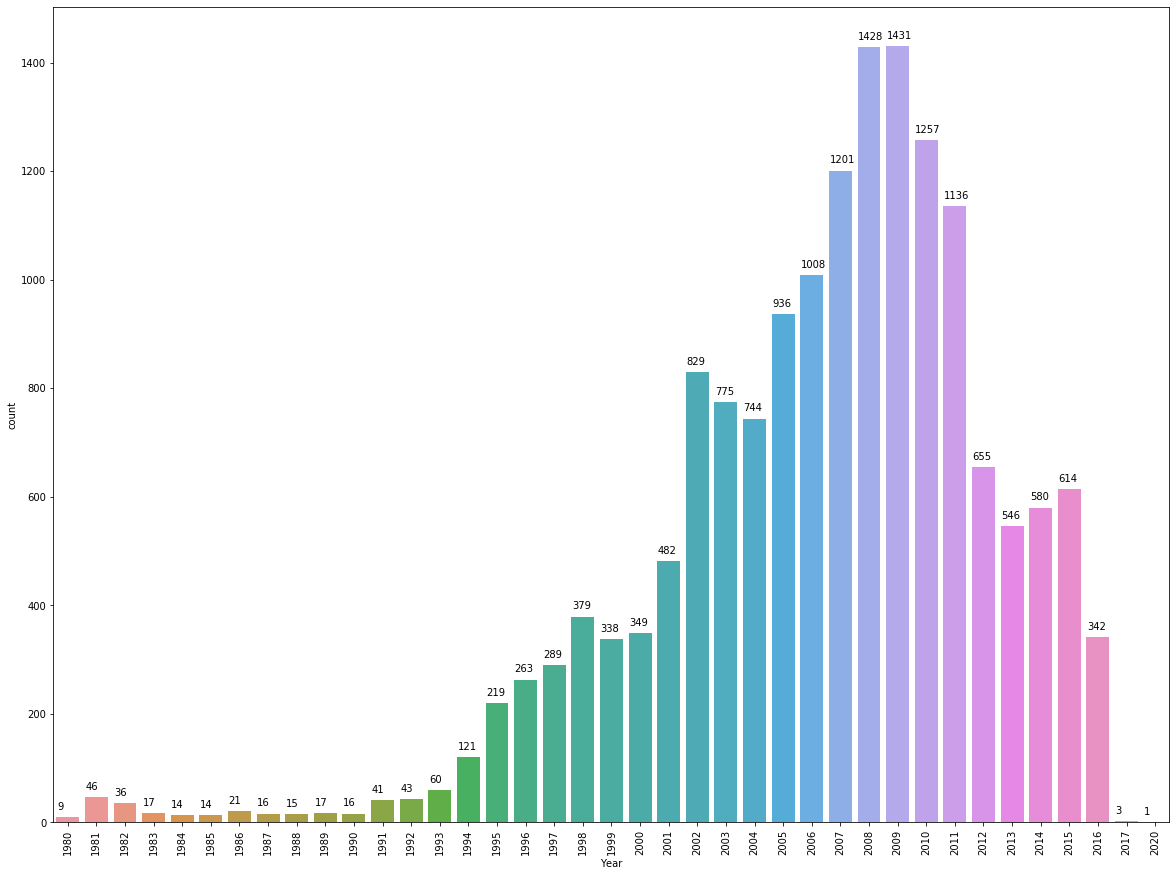

In [41]:
plt.figure(figsize=(20,15))
Year_plot=sns.countplot(df.Year)
plt.xticks(rotation=90)
for w in Year_plot.patches:
    Year_plot.annotate(str(w.get_height()), (w.get_x()+0.02, w.get_height()+10), va='bottom', color='black')
plt.show()
    

Most number of games released in the year 2009 with 1431 games in total

# 3) Which publisher released more number of games

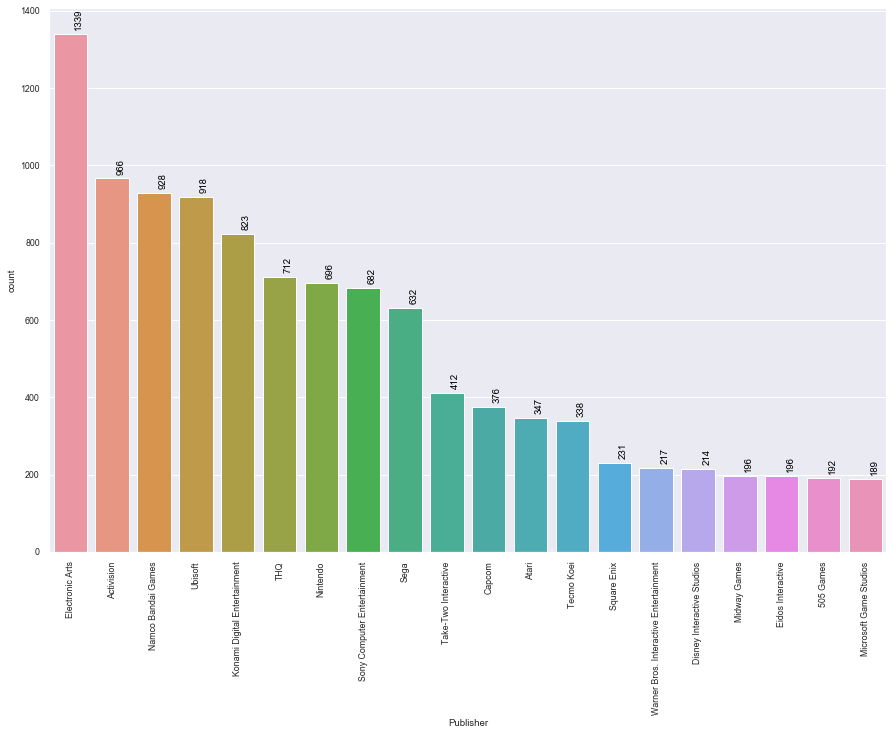

In [120]:
plt.figure(figsize=(15, 10))
Publisher_plot=sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
for y in Publisher_plot.patches:
    Publisher_plot.annotate(str(y.get_height()), (y.get_x()+0.5, y.get_height()+10), va='bottom', color='black', rotation=90)
plt.show()

#  Top 10 Publishers who made more revenue globally

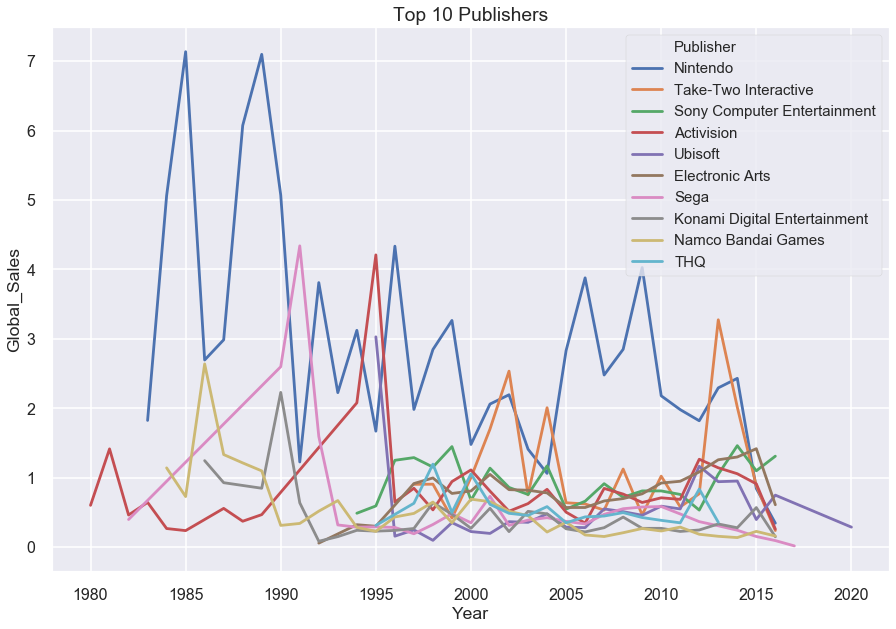

In [161]:
Top_10_Publishers= df.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10).index
top_10_publishers= df[df.Publisher.isin(Top_10_Publishers)]
plt.figure(figsize=(15,10))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=top_10_publishers, ci=None)
plt.title('Top 10 Publishers')
plt.legend(loc='upper right', prop={'size': 15})


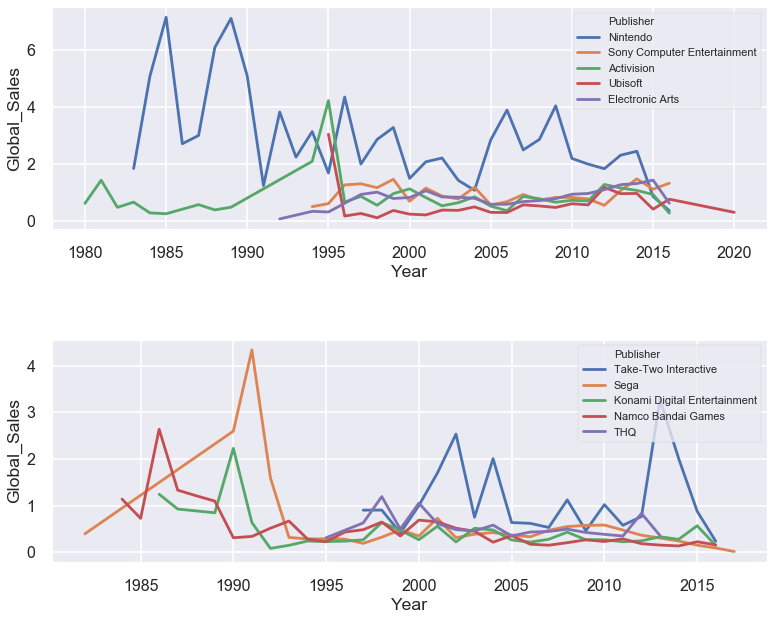

In [150]:
zero_to_five_publishers_list = Top_10_Publishers[0:5]
five_to_ten_publishers_list = Top_10_Publishers[5:]
zero_to_five_publishers_df = df[df.Publisher.isin(zero_to_five_publishers_list)]
five_to_ten_publishers_df = df[df.Publisher.isin(five_to_ten_publishers_list)]
fig, (ax0, ax1) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5, top=1)
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=zero_to_five_publishers_df, ax=ax0,ci=None)
ax0.legend(prop={'size':11})
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=five_to_ten_publishers_df, ax=ax1,ci=None)
ax1.legend(prop={'size':11})

# Top 20 global sales by publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

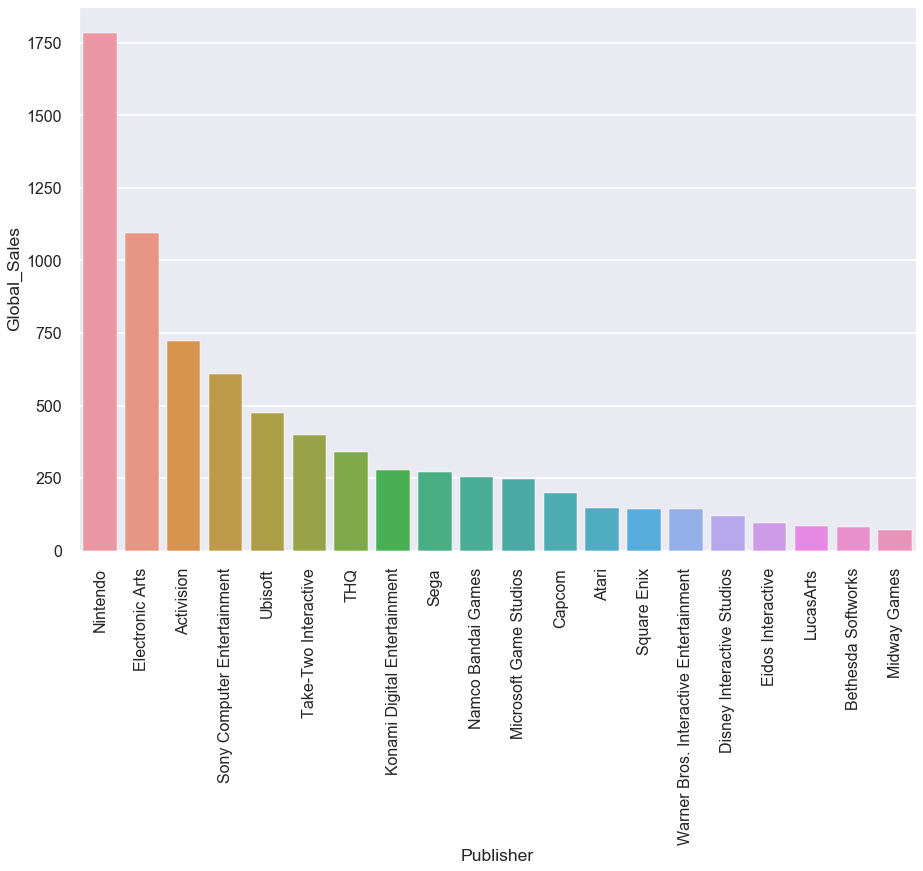

In [162]:
Sales_Publisher = df[['Publisher', 'Global_Sales']]
Sales_Publisher = Sales_Publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
Sales_Publisher = pd.DataFrame(Sales_Publisher).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=Sales_Publisher)
plt.xticks(rotation=90)

# 4) Which Year had most number of sales worldwide

Text(0.5, 1.0, 'Number of sales in Worldwide')

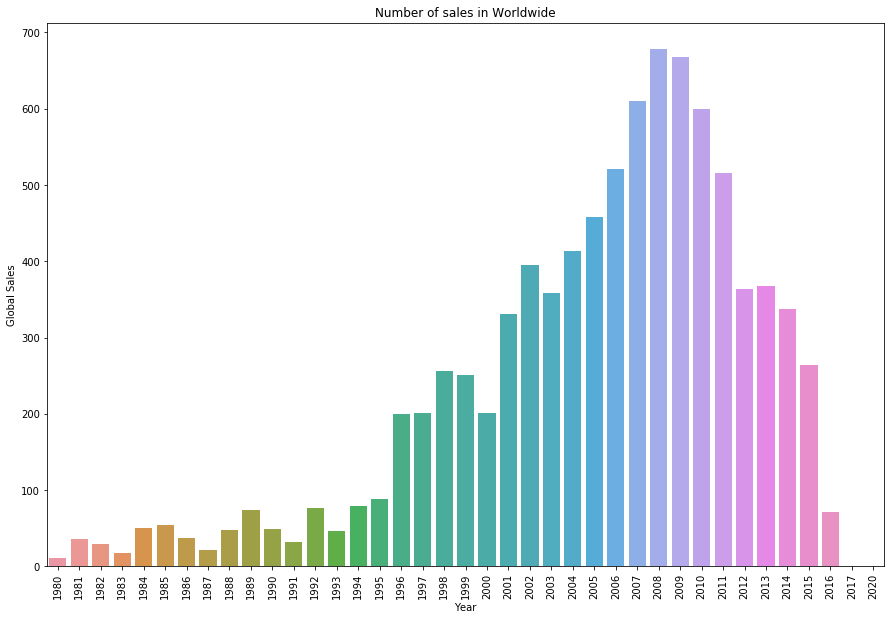

In [51]:
y=df.groupby(['Year'])["Global_Sales"].sum()
x=y.index
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)
plt.xlabel('Year')
plt.xticks(rotation =90)
plt.ylabel('Global Sales')
plt.title('Number of sales in Worldwide')

# 5) Which Platform developed the most

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

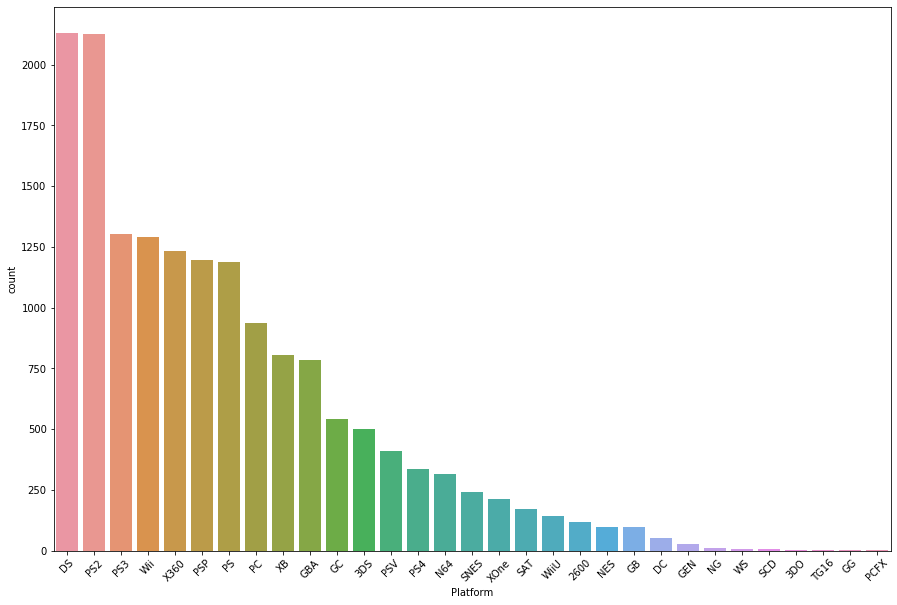

In [52]:
plt.figure(figsize=(15,10))
Platform_plot=sns.countplot(x='Platform', data=df, order=df['Platform'].value_counts().index)
plt.xticks(rotation=45)

# Platfrom have the highest sale price globally

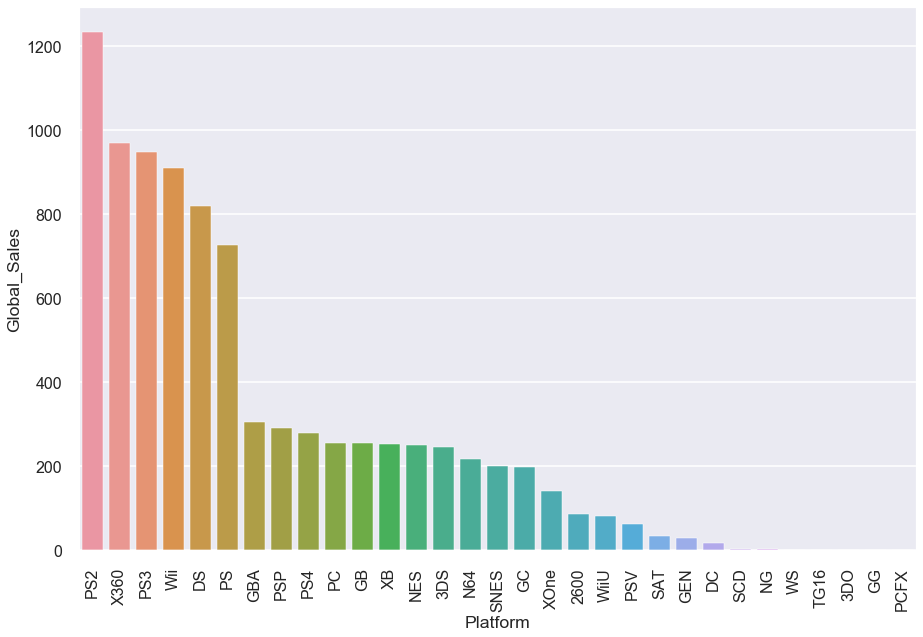

In [159]:
Global_platform = df.groupby(by=['Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=Global_platform)
plt.xticks(rotation=90)
plt.show()

# 6) Plotting top 5 genre sales in each region with respect to an year

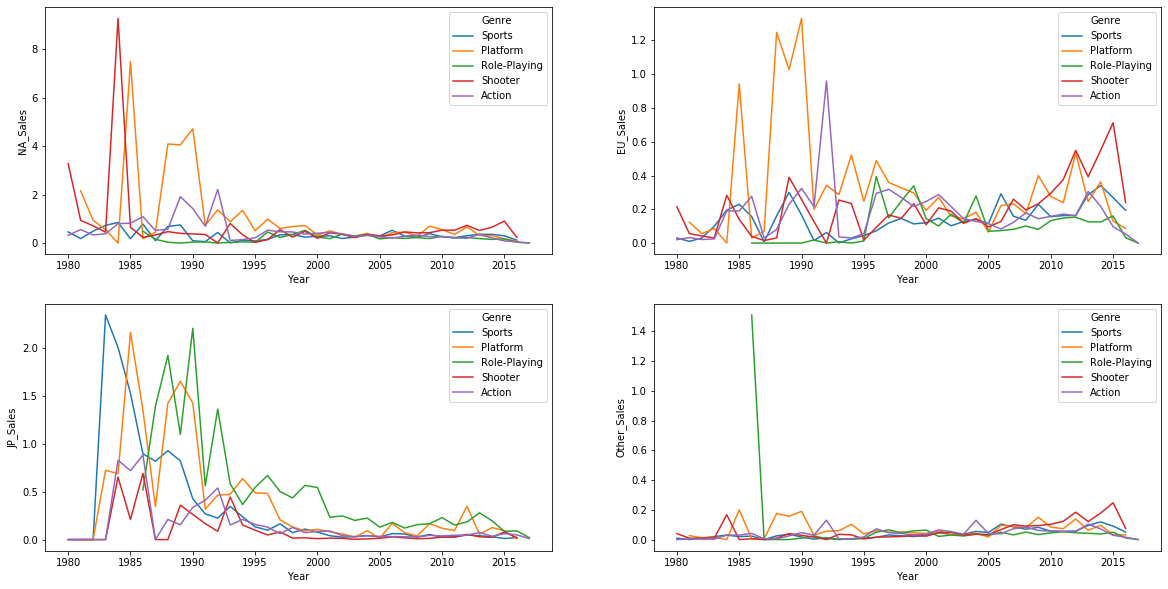

In [78]:
Top_5_Genre=df.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index
top5_genre = df[df.Genre.isin(Top_5_Genre)]
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(20,10)) # to plot multiple plots on a single figure
sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=top5_genre, ax=ax0[0],ci=None)
sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=top5_genre, ax=ax0[1], ci=None)
sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=top5_genre, ax=ax1[0], ci=None)
sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=top5_genre, ax=ax1[1], ci=None)

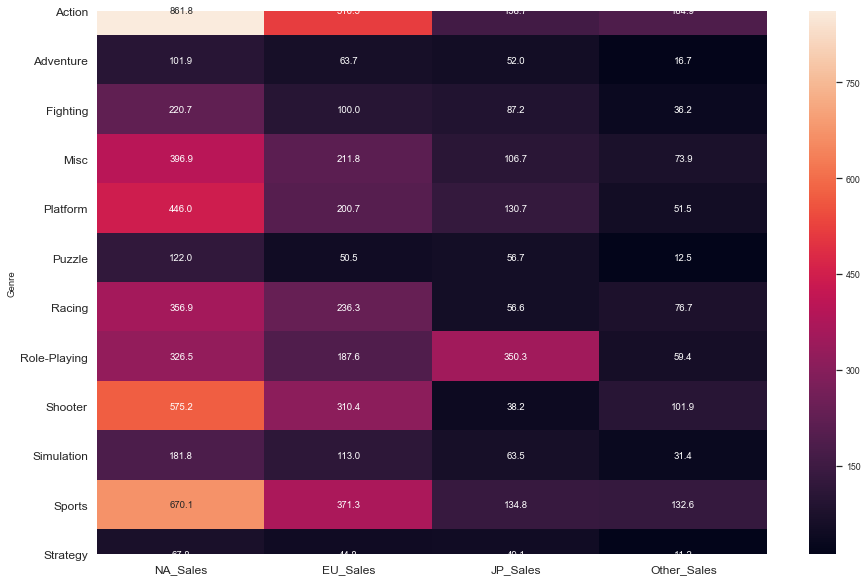

In [113]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  # comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()   # comp_map
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.8)
sns.heatmap(comp_map, annot=True, fmt = '.1f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#  Genre vs Sales Area

In [114]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head(10)

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99
5,Puzzle,NA_Sales,122.01
6,Racing,NA_Sales,356.93
7,Role-Playing,NA_Sales,326.50
8,Shooter,NA_Sales,575.16
9,Simulation,NA_Sales,181.78


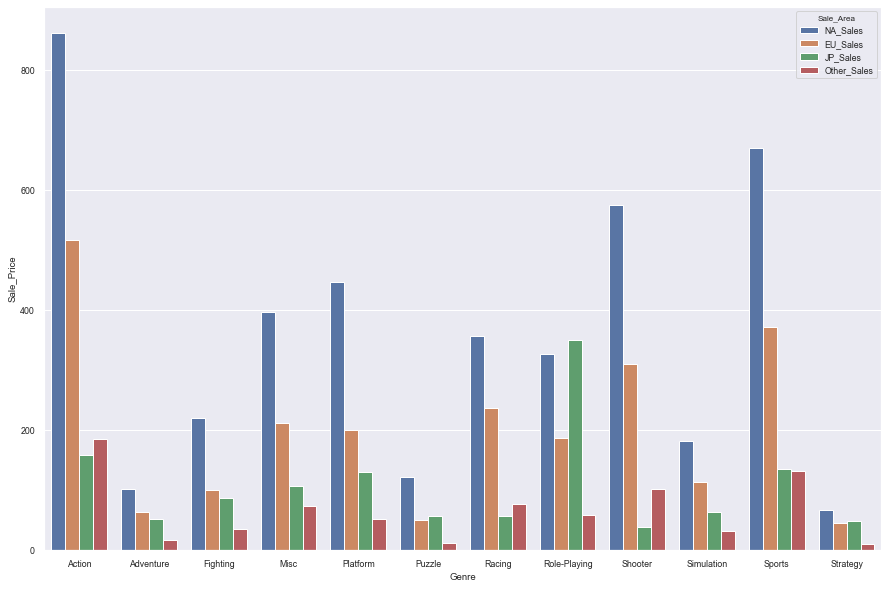

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

# Total Revenue by Region

In [168]:
df1=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1=df1.sum().reset_index()
df1=df1.rename(columns={'index':'Region',0:'Sales'})
df1

,Region,Sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


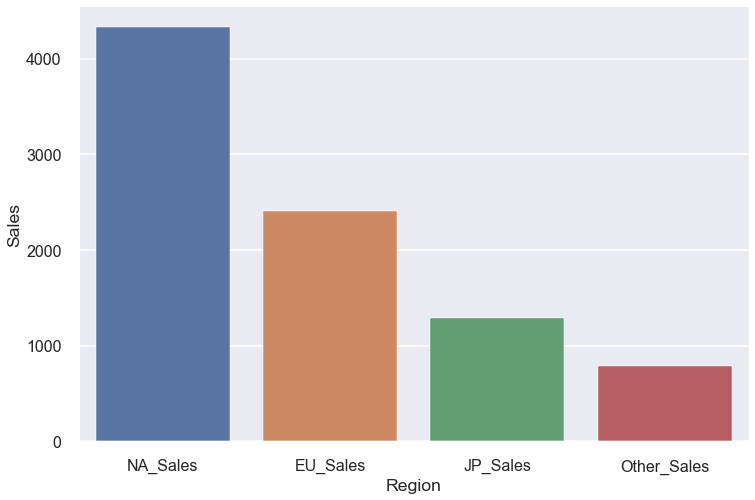

In [169]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data = df1)

# Distribution After log transformation

In [170]:
hist_log = df.copy()
hist_log = hist_log[hist_log.NA_Sales != 0]
hist_log = hist_log[hist_log.EU_Sales != 0]
hist_log = hist_log[hist_log.Other_Sales != 0]
hist_log = hist_log[hist_log.JP_Sales != 0]
hist_log = hist_log[hist_log.Global_Sales != 0]

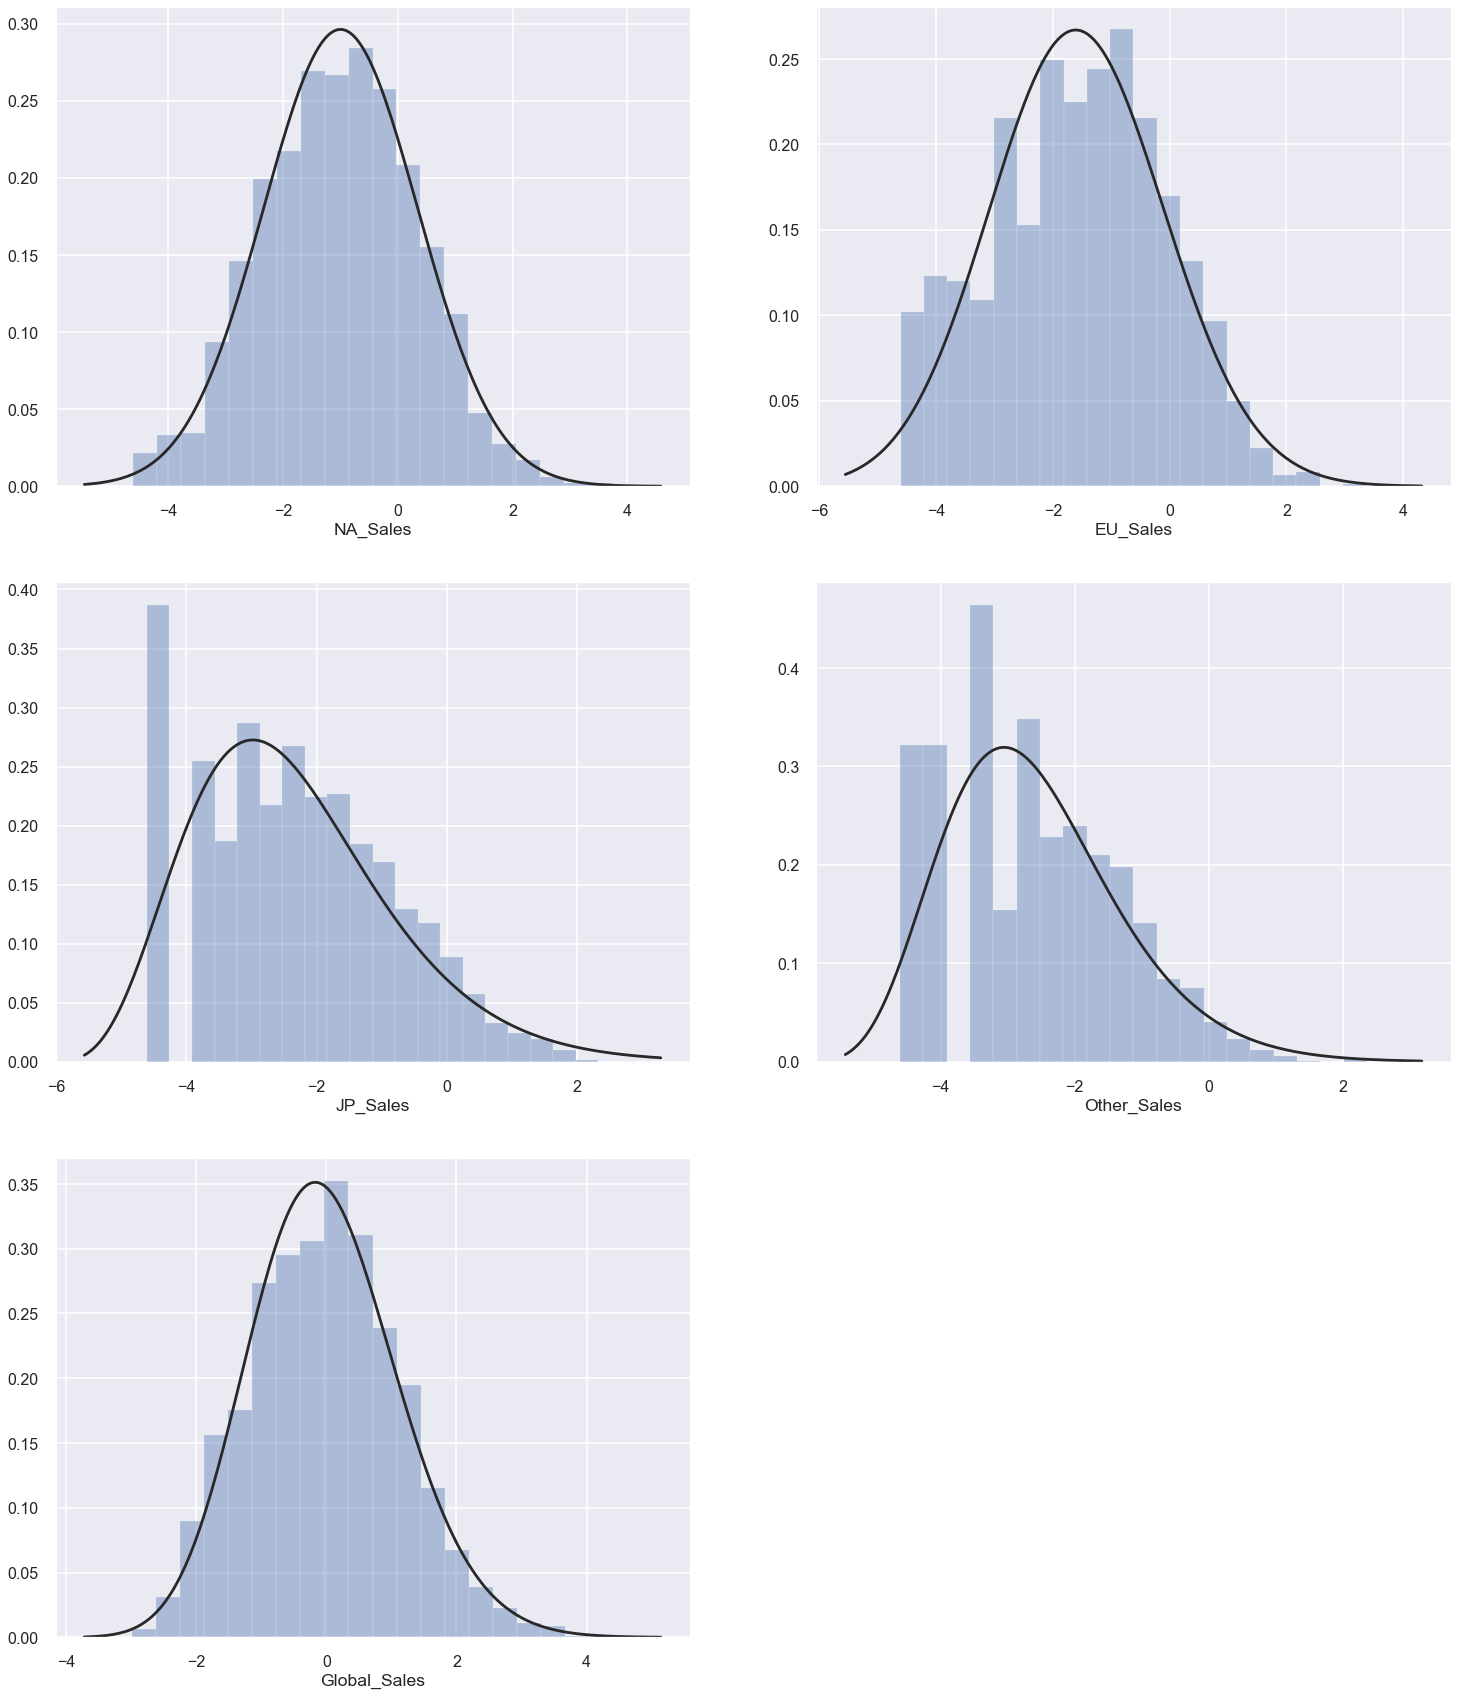

In [173]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(hist_log[column]), bins=20, kde=False, fit=stats.gamma)

Mostly everything is right skewed and symmetric after log transformation, log transformation should be done to transform a highly skewed variable into a more normalized dataset. 

# Relations of columns- Heatmap(to understand corelation)

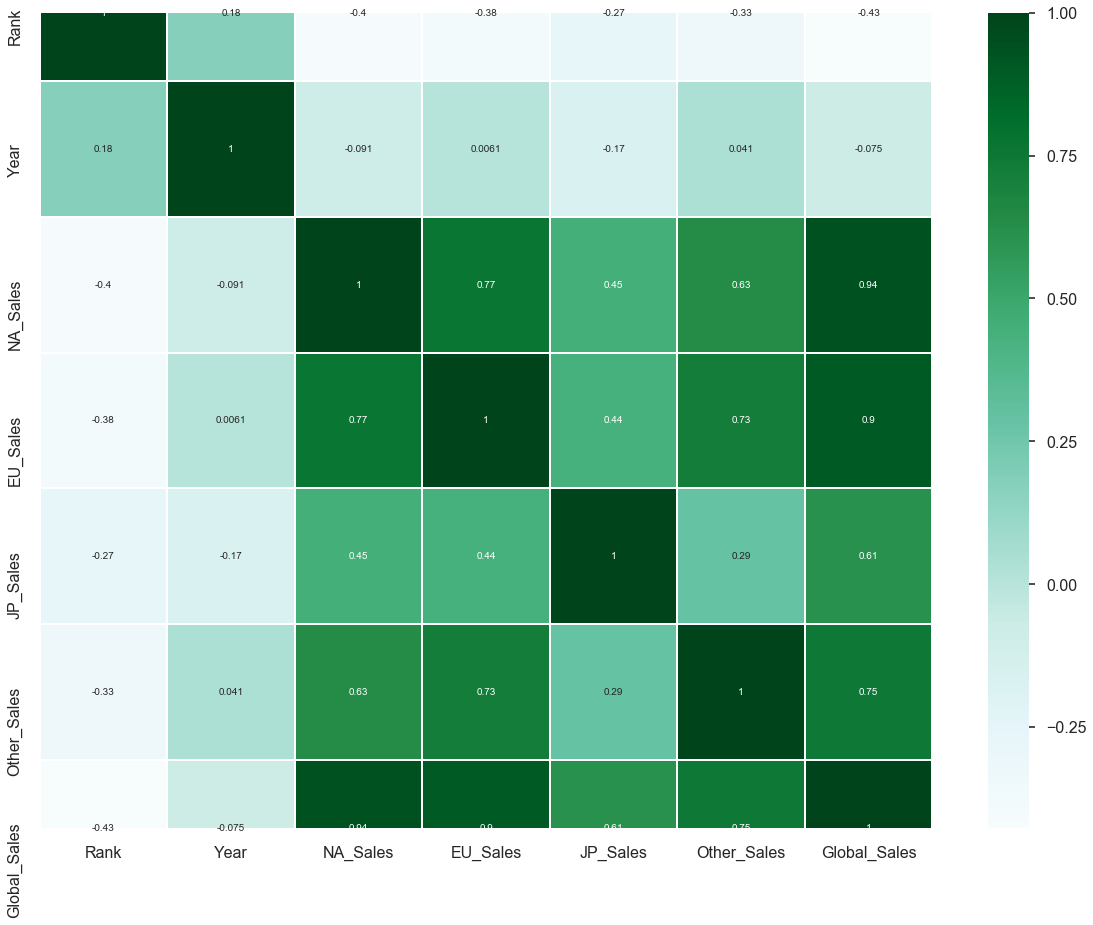

In [186]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap = "BuGn", annot=True, linewidth=1)

NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

# Pair Plot

In [192]:
df_pair_plot = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]]
df_pair_plot

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,1985,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,2008,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,2009,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,1996,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,2003,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,2008,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,2010,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


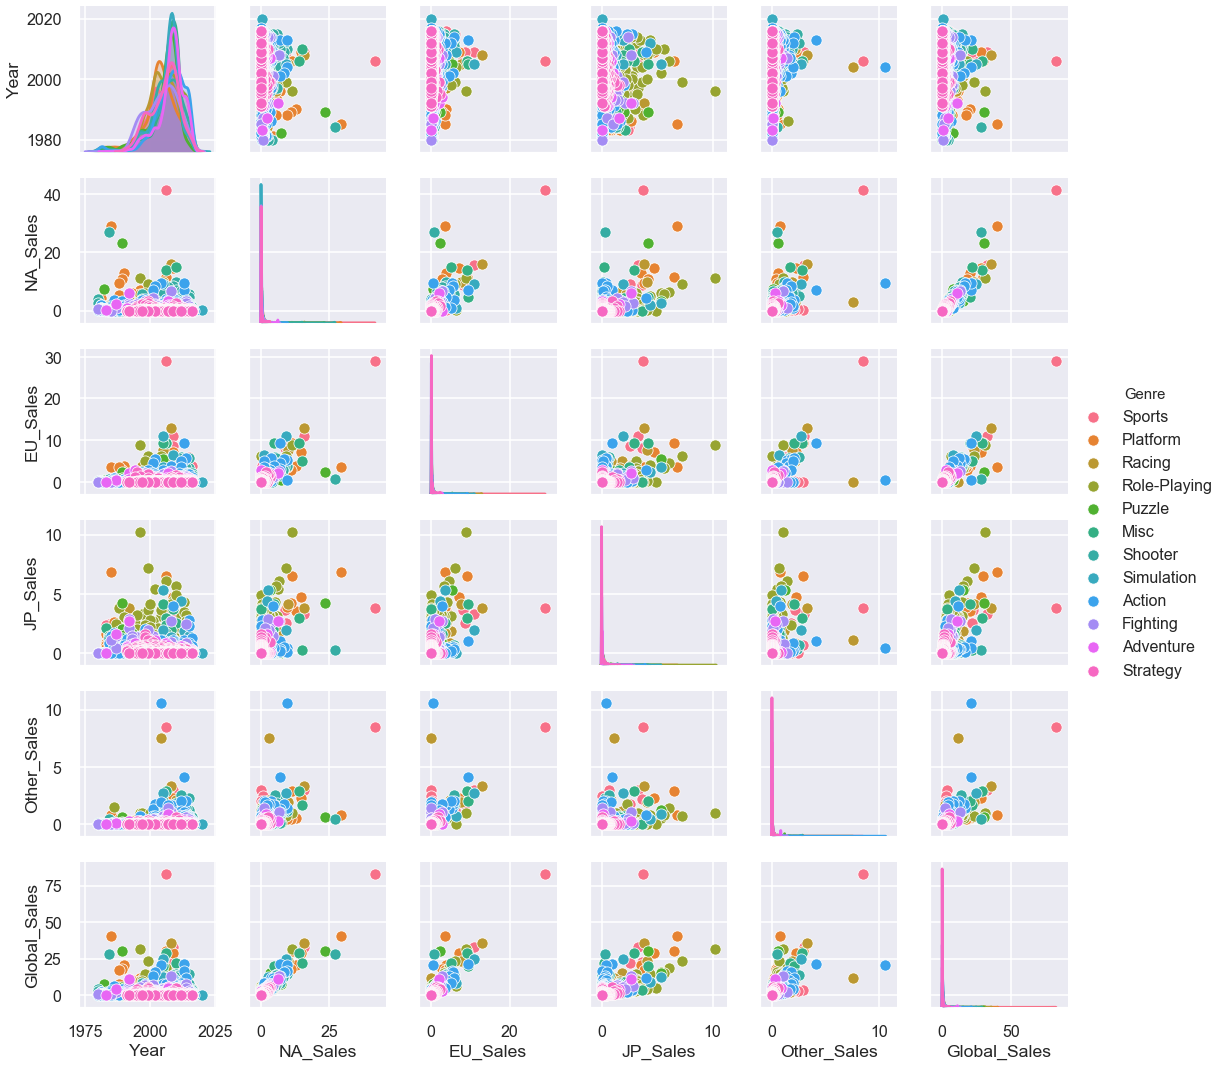

In [193]:
sns.pairplot(data=df_pair_plot, hue='Genre')

# Log Work

In [197]:
log_pair_plot=df_pair_plot.copy()
log_pair_plot = log_pair_plot[log_pair_plot.NA_Sales != 0]
log_pair_plot = log_pair_plot[log_pair_plot.EU_Sales != 0]
log_pair_plot = log_pair_plot[log_pair_plot.JP_Sales != 0]
log_pair_plot = log_pair_plot[log_pair_plot.Other_Sales != 0]
log_pair_plot = log_pair_plot[log_pair_plot.Global_Sales != 0]
log_pair_plot

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,1985,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,2008,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,2009,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,1996,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
11896,2015,PSV,Role-Playing,0.01,0.02,0.04,0.01,0.07
12012,2016,PS3,Fighting,0.01,0.02,0.02,0.01,0.07
12488,2016,PS3,Role-Playing,0.01,0.02,0.03,0.01,0.06
13000,2014,PS3,Role-Playing,0.03,0.01,0.01,0.01,0.05


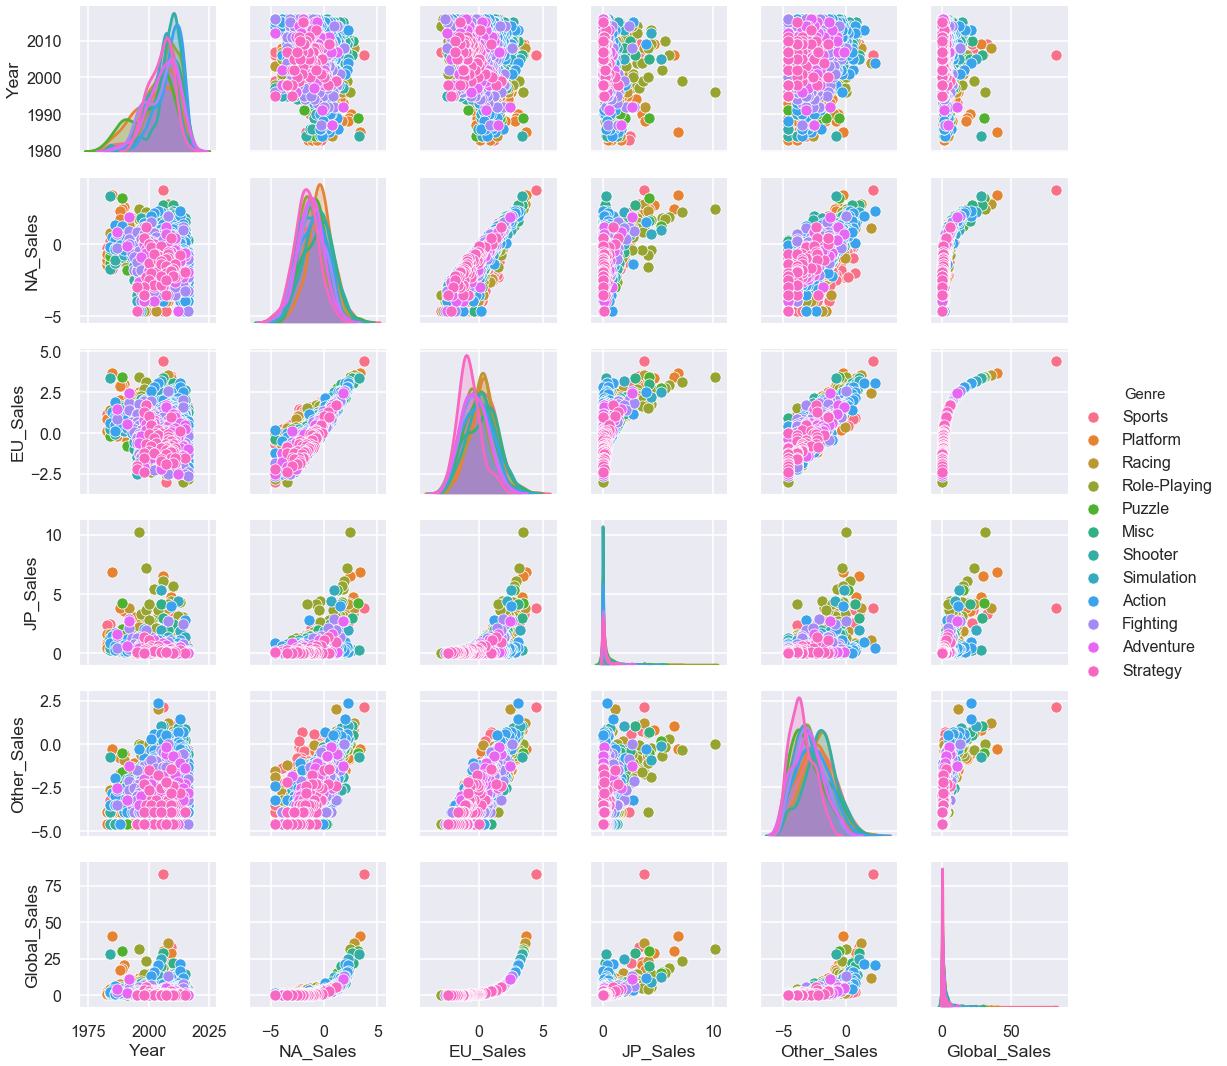

In [198]:
log_pair_plot['NA_Sales'] = np.log(log_pair_plot['NA_Sales']);
log_pair_plot['EU_Sales'] = np.log(log_pair_plot['EU_Sales']);
log_pair_plot['Other_Sales'] = np.log(log_pair_plot['Other_Sales']);
log_pair_plot['EU_Sales'] = np.log(log_pair_plot['JP_Sales']);
log_pair_plot['EU_Sales'] = np.log(log_pair_plot['Global_Sales']);
sns.pairplot(data=log_pair_plot, hue='Genre')